# Flight data Exploration
## by Aravind

## Investigation Overview

> The objective of the investigation is to understand and study the various delays associated with arrival airports and airlines which would help in analysing the operational effiency of both the Airlines and Airports apart from the weather interventions in arrival locations

## Dataset Overview

>The flights dataset have been used in this project which will be explored using many level of visualisation. This data reports <br> Aggregated version of data has been used which is obtained from https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp and it contains details of the arrival points of flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.<br> 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#creating function for grouping variables based on mean
def custom_grouping_mean(var1,var2,**kwargs):
    df_gr=df_clean.groupby(var1)[var2].mean()
    df_gr=pd.DataFrame(df_gr)
    df_gr.reset_index(inplace=True)
    df_gr.sort_values(by=var2,inplace=True,ascending=True)
    return df_gr
#creating functions for grouping for bar plots
def custom_plots(x,y,xlabel,ylabel,title,ax=None,**kwargs):
    if ax is None:
        plt.gca()
    ax=sb.barplot(x,y,palette='Blues')
    plt.xticks(rotation=80)
    ax.set(xlabel=xlabel,ylabel=ylabel,title=title);
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.title(title,fontsize=15)
    return ax
    

In [3]:
# load in the dataset into a pandas dataframe
#importing the dataset
df=pd.read_csv('689463768_122020_1644_airline_delay_causes.csv')
#taking a copy of the dataset
df_clean=df.copy()
#taking out Null values and 'Unnmaed: 21 column'
nan_index=df_clean[(df_clean['arr_del15'].isna())|(df_clean[' arr_delay'].isna())].index
df_clean.drop(index=nan_index,columns='Unnamed: 21',inplace=True)
#encoding the numerical months into textual months
df_clean['month']=pd.cut(df_clean[' month'],12,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#renaming out the columns
df_clean.rename(columns={'arr_flights':'Arrived_flights','arr_del15':'Delayed_Flight_Count','carrier_ct':'Delayed_carrier_count',
                        ' weather_ct':'Delayed_weather_count','nas_ct':'Delayed_NAS_count','security_ct':'Delayed_security_count', 'late_aircraft_ct':'Delayed_late_count', 'arr_cancelled': 'ArrivalCancelled',
       ' arr_delay':'Delayed_arrival_mins', ' carrier_delay':'Delayed_carrier_mins','weather_delay':'Delayed_weather_mins', 'nas_delay':'Delayed_NAS_mins',
       'security_delay':'Delayed_security_mins', 'late_aircraft_delay':'Delayed_Aircarft_mins'},inplace=True)
#rounding the count columns
cols=['Delayed_Flight_Count', 'Delayed_carrier_count',
       'Delayed_weather_count', 'Delayed_NAS_count', 'Delayed_security_count',
       'Delayed_late_count']
for _ in cols:
    df_clean[cols]=df_clean[cols].astype('int64')

In [4]:
#custom function for grouping by three variables 
def custom_grouping_mean2(var1,var2,var3,**kwargs):
    df_gr=df_clean.groupby([var1,var2])[var3].mean()
    df_gr=pd.DataFrame(df_gr)
    df_gr.reset_index(inplace=True)
    df_gr.sort_values(by=var3,inplace=True)
    return df_gr

## Visualization 1-Frequently occured Air delay counts

> Frequency on Number of flights have been analysed using a Histogram, and it looks to have spikes around 0-1000  ,between 3000 and 3500,between 4000 and 5000 which indicates it is a multi-modal distribution. The Log transformation have been performed to magnify the changes. Would be interesting to extend this in terms of delayed minutes in terms of airlines.

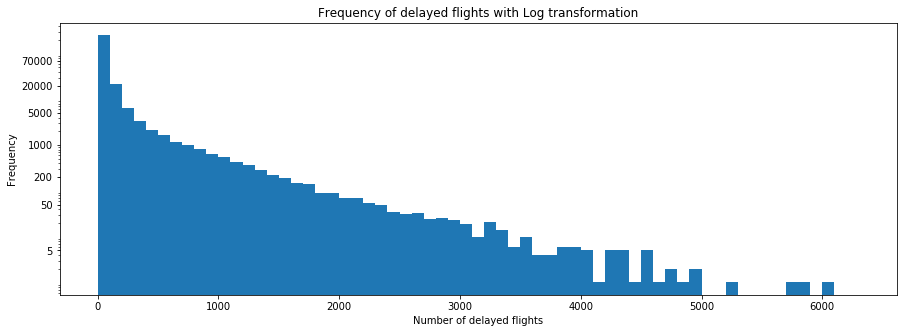

In [7]:
plt.figure(figsize=[15,5])
bins=np.arange(0,max(df_clean['Delayed_Flight_Count'])+1,100)
ticks=[5,50,200,1000,5000,20000,70000]
labels=['{}'.format(v) for v in ticks]
plt.hist(data=df_clean,x='Delayed_Flight_Count',bins=bins);
plt.yscale('log')
plt.xlabel('Number of delayed flights')
plt.ylabel('Frequency')
plt.title('Frequency of delayed flights with Log transformation')
plt.yticks(ticks,labels);


## Analyzing the Airlines delays



## Visualization 2-Airlines causing most delay

> The airlines SouthWest Airlines and American Airlines have caused the most delays while the allegiant and Aloha airlines have resulted in the least average delays across the years. Would be interesting to analyse this across the years.

In [6]:
#grouping based on delays for airlines
df_carr_mean=custom_grouping_mean('carrier_name','Delayed_arrival_mins')
df_carr_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 3 to 27
Data columns (total 2 columns):
carrier_name            32 non-null object
Delayed_arrival_mins    32 non-null float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


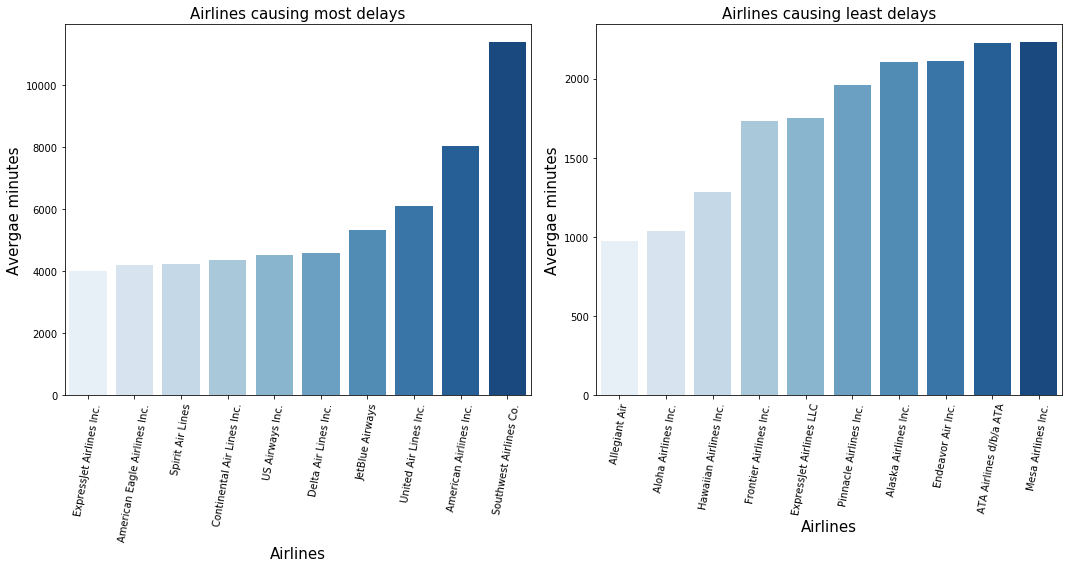

In [8]:
#plotting the most and least delays
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
custom_plots(df_carr_mean['carrier_name'].tail(10),df_carr_mean['Delayed_arrival_mins'].tail(10),'Airlines','Avergae minutes','Airlines causing most delays')
plt.subplot(1,2,2)
custom_plots(df_carr_mean['carrier_name'].head(10),df_carr_mean['Delayed_arrival_mins'].head(10),'Airlines','Avergae minutes','Airlines causing least delays')
plt.tight_layout()

## Visualization 3-  Airlines with their Delayed minutes across the years

> From the  plot it can be inferred that HA airlines ie., Hawaiian Airlines Inc have the least delay and they have maintained it across the years, while the maximum delay for majority of the years have been WN which is Southwest Airlines.

In [10]:
#applying the above functions to create 
df_mon=custom_grouping_mean2('year','carrier','Delayed_arrival_mins')


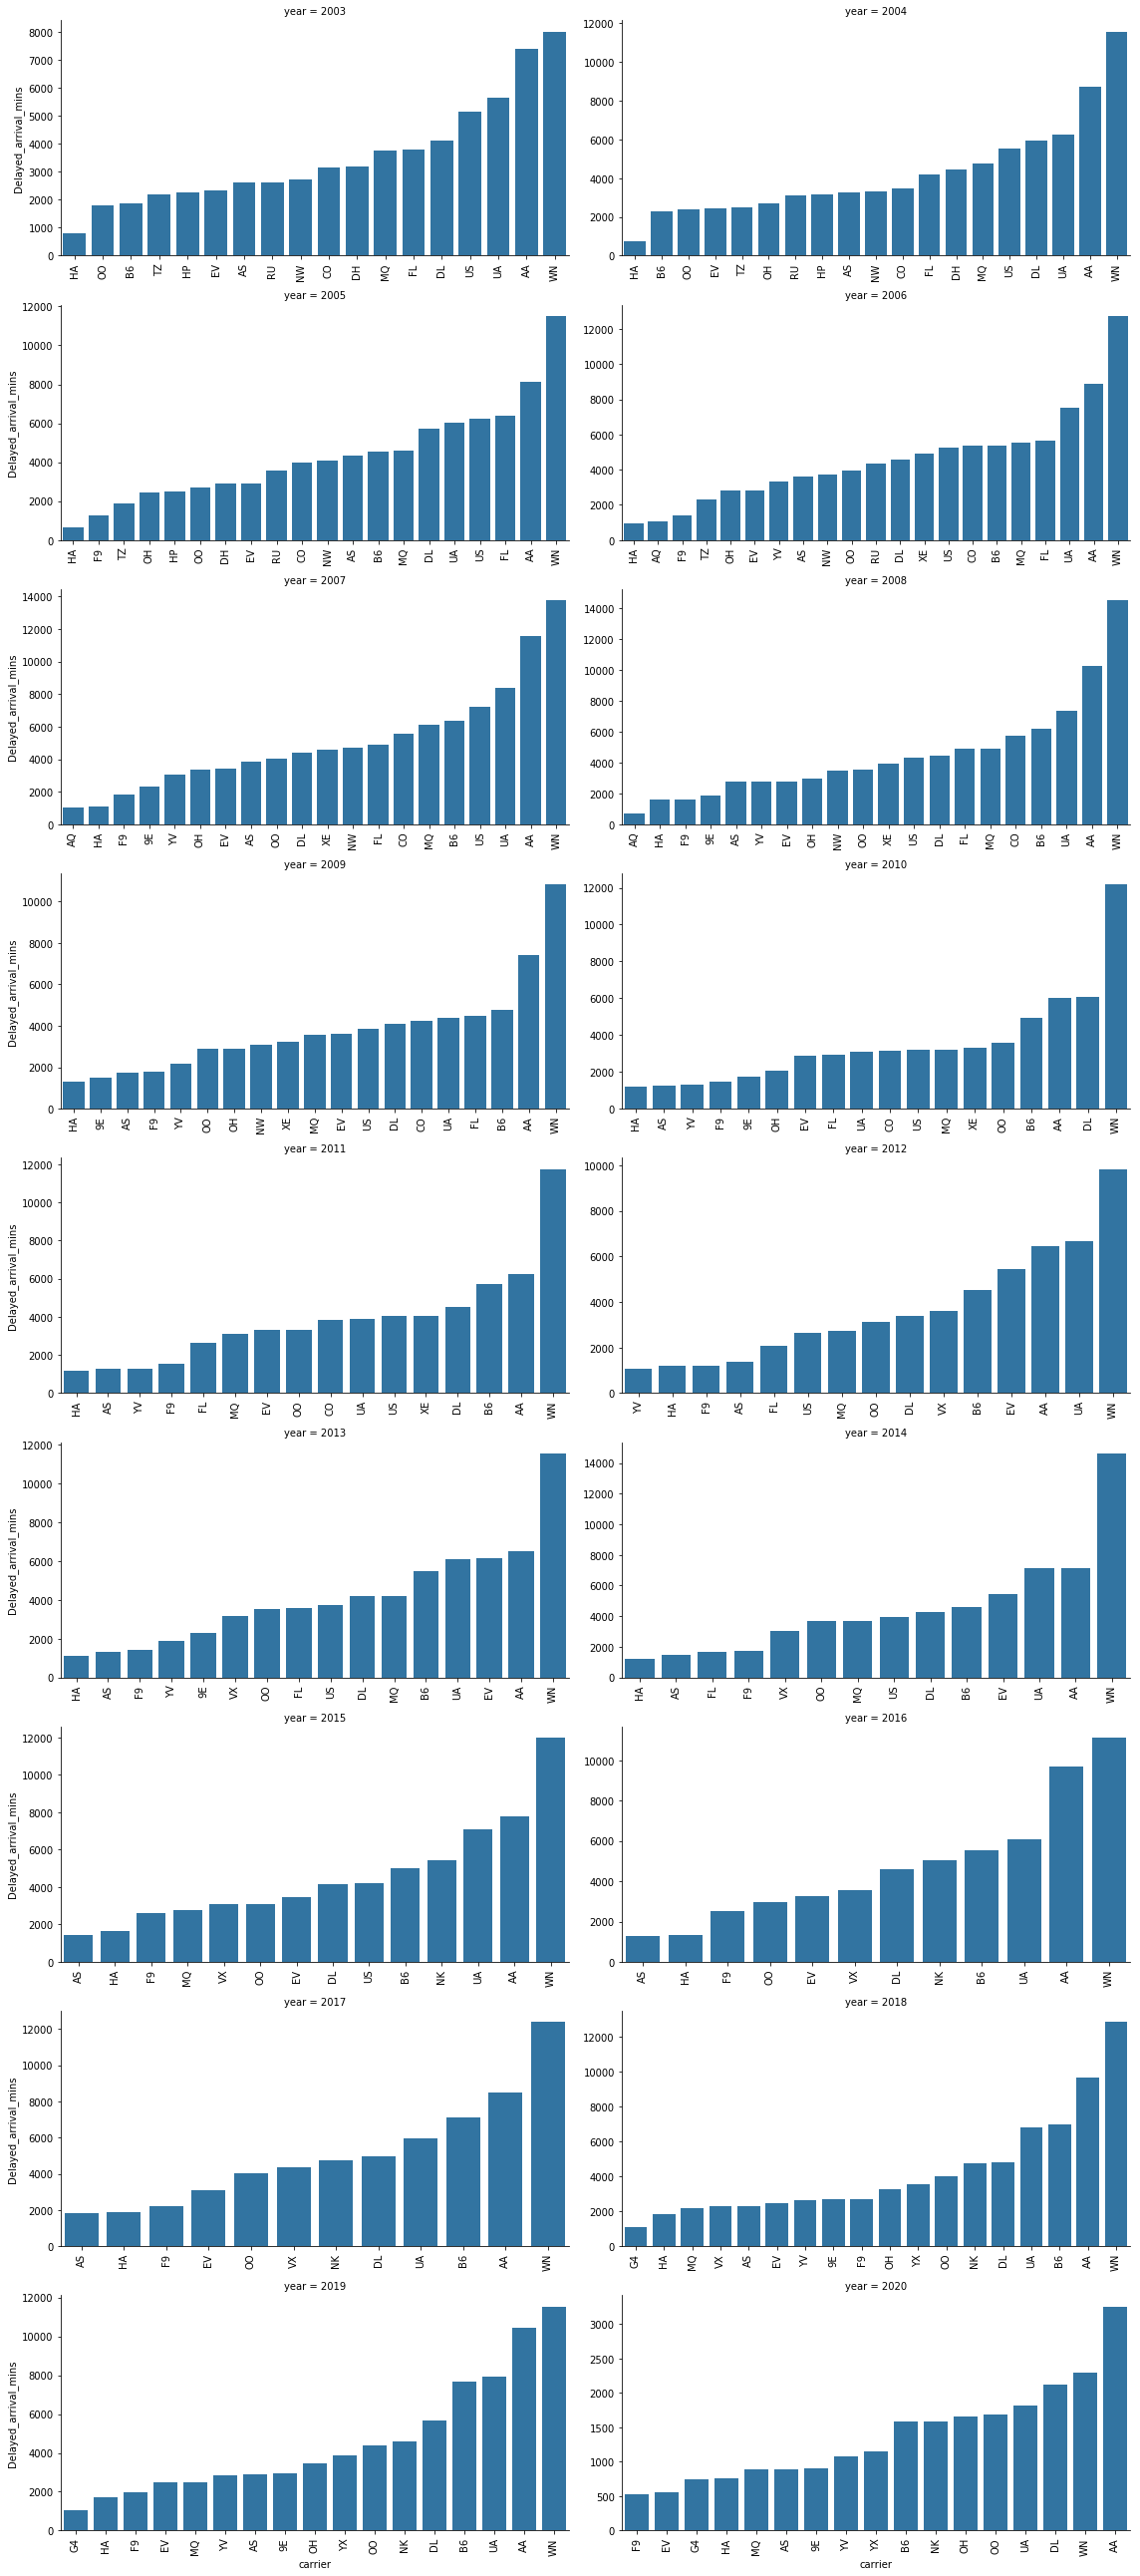

In [22]:
#creating facet charts with bar plots
g=sb.FacetGrid(data=df_mon,col='year',height=4,sharex=False,sharey=False,aspect=2,col_wrap=2,margin_titles=True)
g.map(sb.barplot,'carrier','Delayed_arrival_mins')
g.set_xticklabels(rotation=90)
plt.tight_layout()

## Visualization 4-  Carrier's overall performance in terms of Aircraft Delay across the years

While most of the Airlines are on par with each other in terms of running their aircraft on time, SouthWest airlines have been the worst maintained airline in terms of maintaining the promised timeline.

In [24]:
#creating a pivot table for using it in a heatmap
g1=df_clean.groupby(['year','carrier']).mean()['Delayed_late_count']
g1=g1.reset_index(name='Delayed_late_count')
g1 = g1.pivot(index = 'year', columns = 'carrier',
                            values = 'Delayed_late_count')


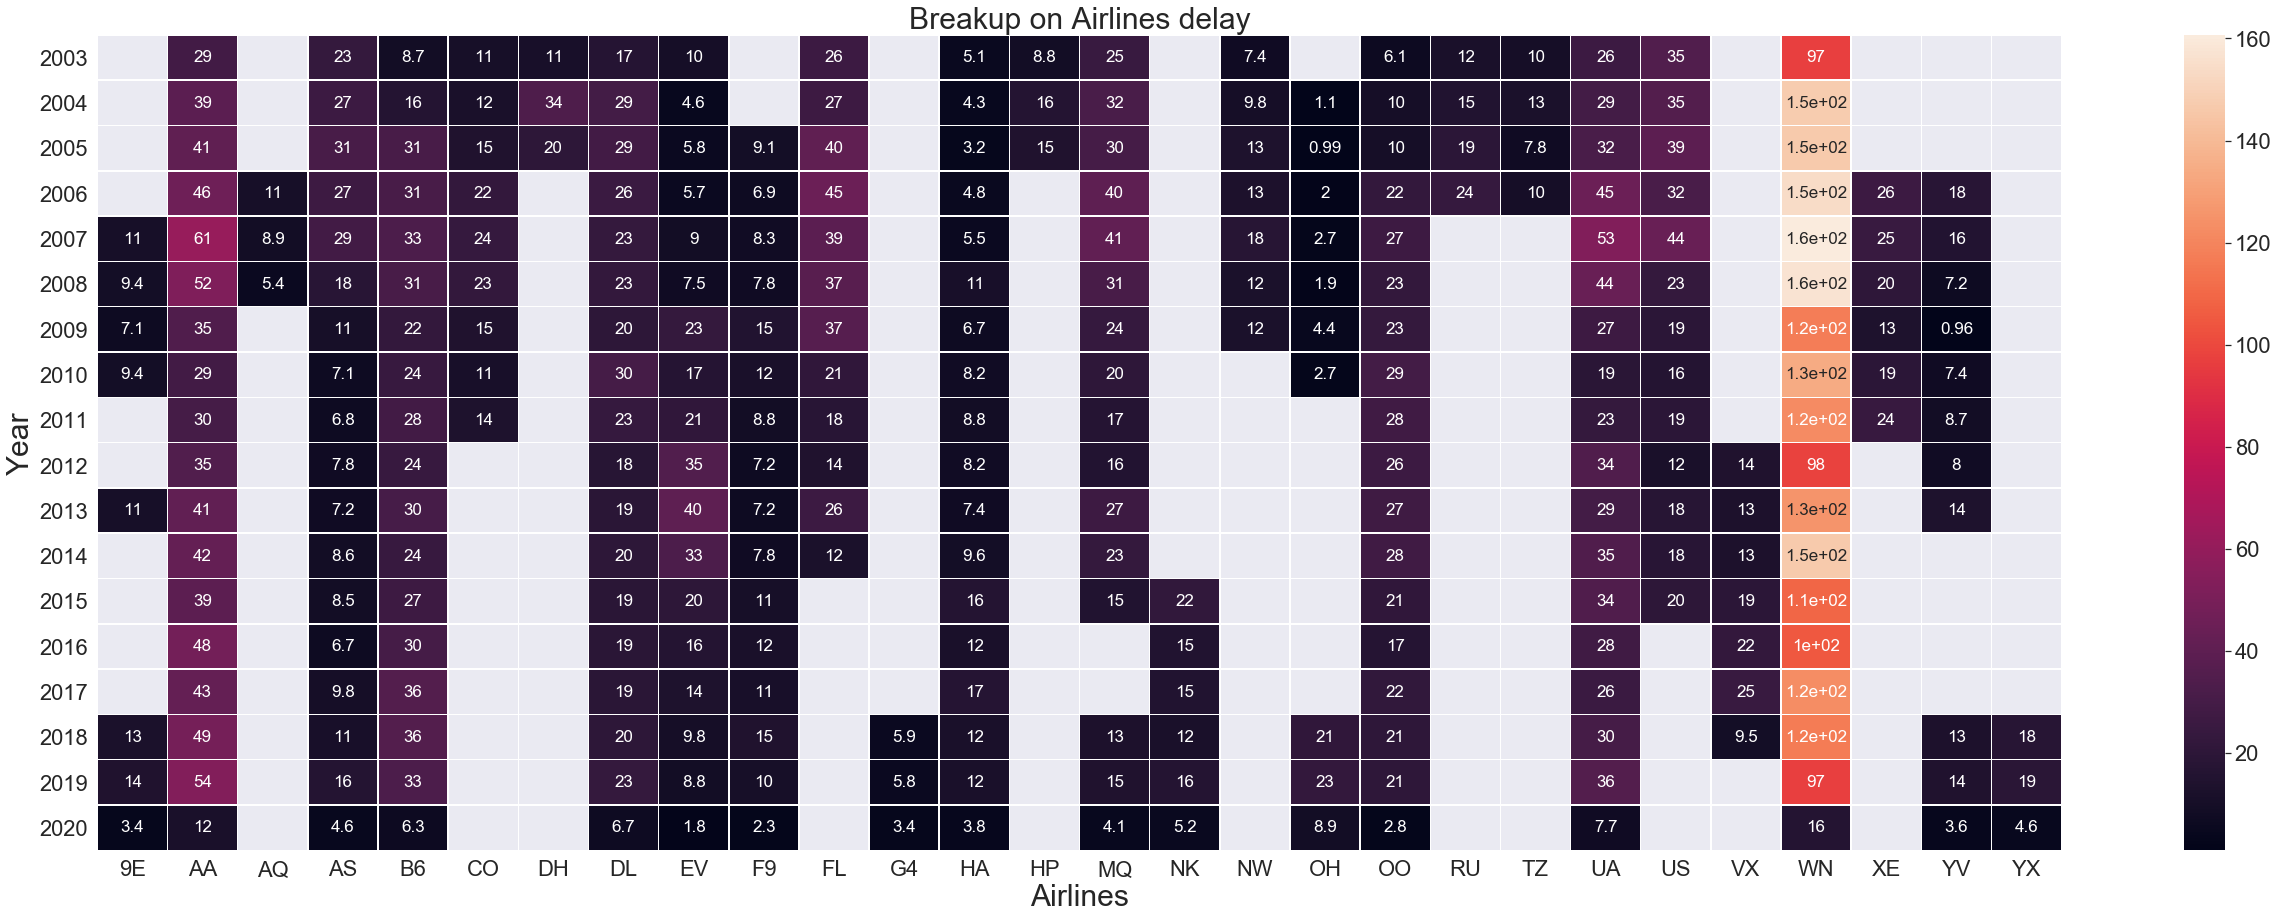

In [26]:
#visualiziing the late counts by airlines
plt.figure(figsize=(44,15))
sb.set(font_scale = 2)
sb.heatmap(data=g1,annot=True,linewidths=0.5,annot_kws={'size': 17})
plt.xlabel('Airlines',fontsize=30)
plt.ylabel('Year',fontsize=30)
plt.title('Breakup on Airlines delay',fontsize=30)
plt.yticks(rotation=0);

## Visualization 5-  Operational flights for each Carrier </b> 

The airlines SouthWest Airlines and American Airlines have caused the most delays while the allegiant and Aloha airlines have resulted in the least average delays across the years. Would be interesting to analyse this across the years.

In [56]:
p=custom_grouping_mean('carrier','Arrived_flights')

Text(0,0.5,'Average Number of flights')

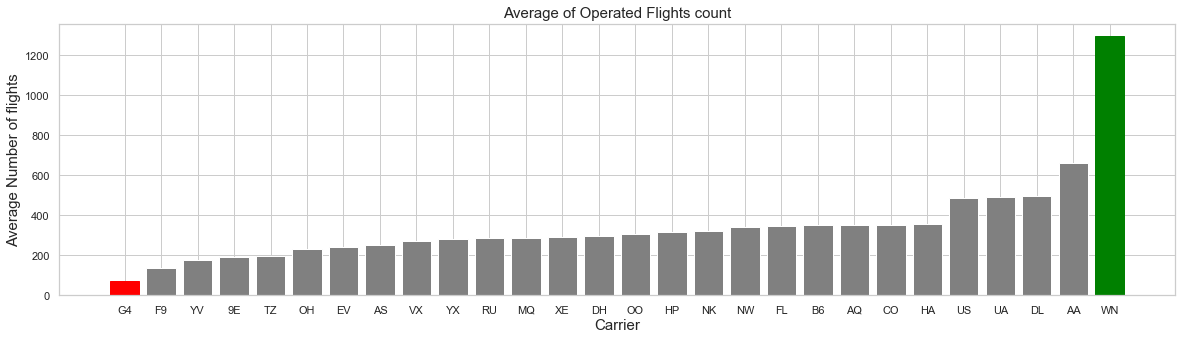

In [57]:
plt.figure(figsize=[20,5])
plot=plt.bar(p['carrier'],p['Arrived_flights'],color='Grey')
plot[-1].set_color('Green')
plot[0].set_color('red')

plt.title('Average of Operated Flights count',fontsize=15)
plt.xlabel('Carrier',fontsize=15)
plt.ylabel('Average Number of flights',fontsize=15)

## Analyzing the Weather delays



## Visualization 6-  Most Weather delays in Arrival airports

> Airports Atlanta,Dallas and Chicago have been causing the most delays which could suggest the airports could have been along the coatal/tropical 
climate where cyclones, Hurricanes or extreme weather conditions.

In [45]:
#grouping Airports based on weather delays
df_weather=custom_grouping_mean('airport','Delayed_weather_mins')


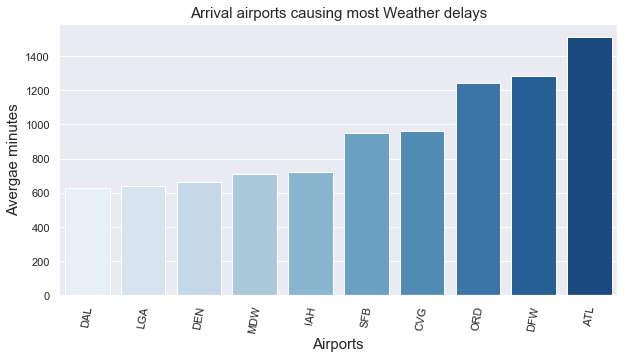

In [59]:
#plotting most weather delayed airports
plt.figure(figsize=[10,5])
custom_plots(df_weather['airport'].tail(10),df_weather['Delayed_weather_mins'].tail(10),'Airports','Avergae minutes','Arrival airports causing most Weather delays')

## Visualization 7-  Weather delays across seasons 

> Interestingly the number of flights which had weather delays has increased between june-August which might indicate that the wettest part of the year while October-Decemeber has recorded the least weather delays, which are suprising given that snowfall occurs in this seasons. June-August are also the months which have maximium travel rate

In [49]:
#grouping Airports based on weather delays
#grouping flights with months to weather delays
df_air_flights=df_clean.groupby('month')['Arrived_flights','Delayed_weather_count'].sum()
df_air_flights.reset_index(inplace=True)
df_air_flights.sort_values(by='Arrived_flights',ascending=True,inplace=True)

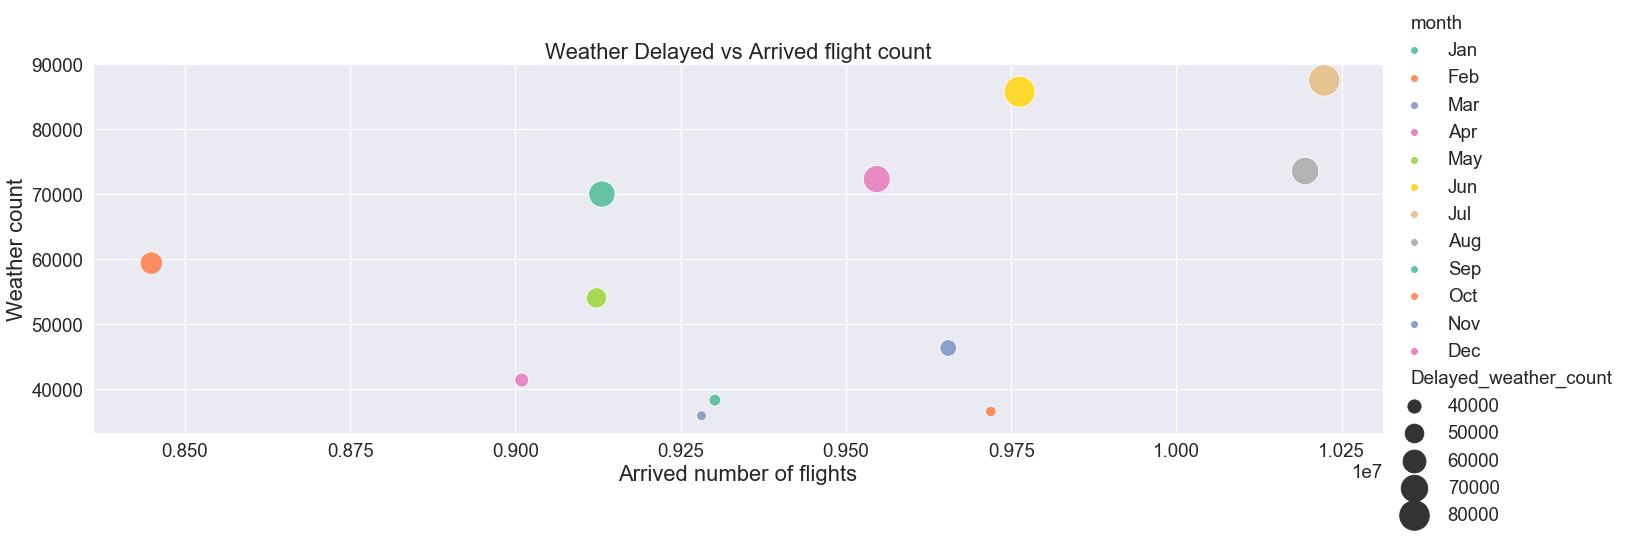

In [50]:
#using relplot to visualize the changes in the weather delays
sb.set(font_scale = 1.7)
sb.relplot(data=df_air_flights,x='Arrived_flights',y='Delayed_weather_count',hue='month',size='Delayed_weather_count',sizes=(100,1000),palette="Set2",height=6.5,aspect=3)
plt.xlabel('Arrived number of flights',fontsize=22)
plt.ylabel('Weather count',fontsize=22)
plt.title('Weather Delayed vs Arrived flight count',fontsize=22);


## Analyzing the Overall Delays 



## Visualization 8-  Number of arrived flights vs number of delayed flights 

> As expected the number of delayed flights have increased with the number of flight services increasing.

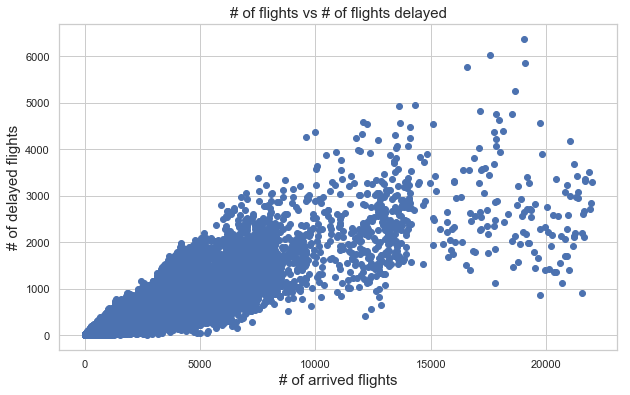

In [70]:
#visualizing the relation between number of flights with number of delayed flights
plt.figure(figsize=[10,6])
plt.scatter(df_clean['Arrived_flights'],df_clean['Delayed_Flight_Count'])
plt.title('# of flights vs # of flights delayed',fontsize=15)
plt.xlabel('# of arrived flights',fontsize=15)
plt.ylabel('# of delayed flights',fontsize=15);

## Visualization 9-  Factors contibuting to NAS delay

> The National Airspace system  NAS delays which accounts to delays due to  airport oper ations, heavy traffic volume, air traffic control, etc. The factors contributing to NAS has been visualized from which all the delay parameters has an equal effect for the maximum effect ie., between 0-500 counts of Carrier, security, weather and late aircraft have accounted max delay counts in NAS delays. But the more number of NAS delays have occured due to Late aircraft delay and Carrier delay which accounts to the flight company's effiecieny.

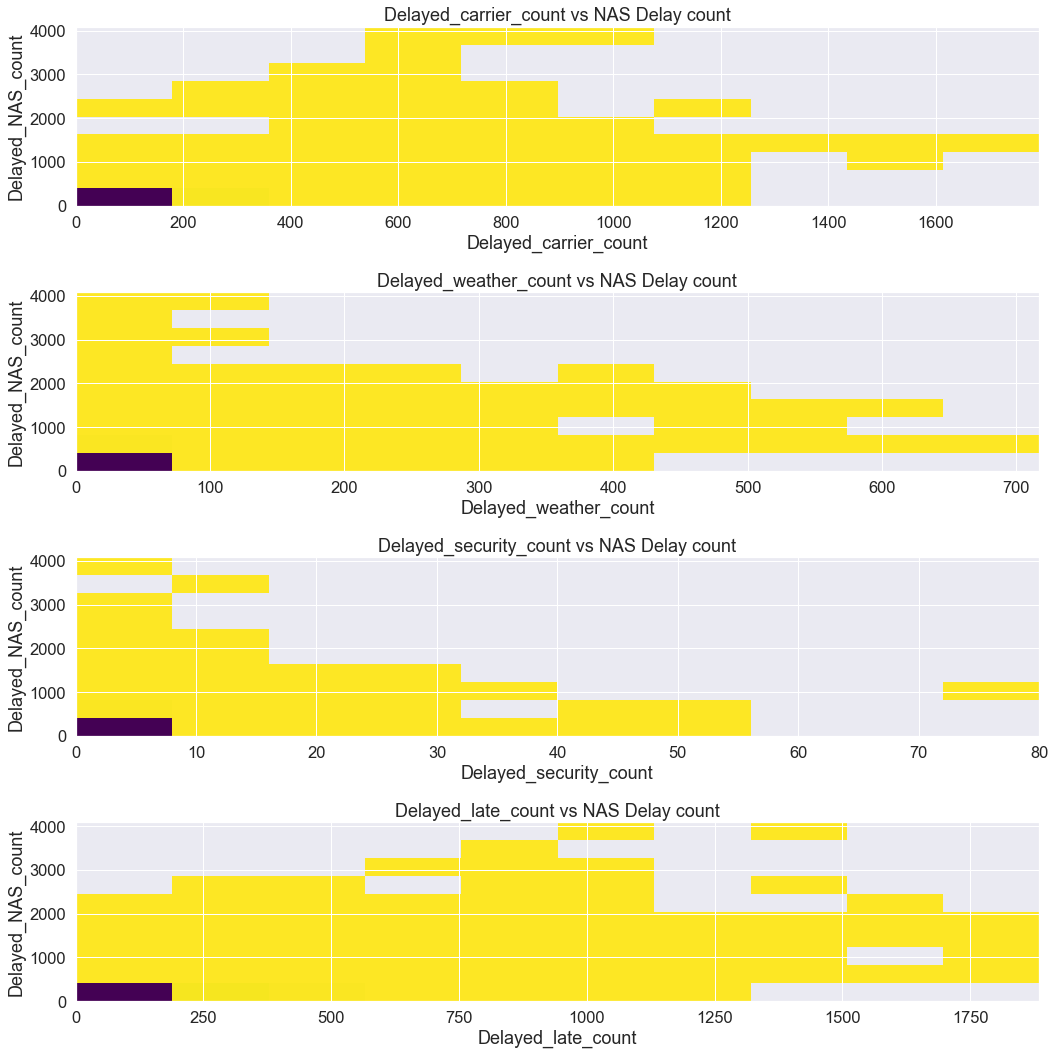

In [36]:
#plotting the contributing factors for NAS delays
fig, ax = plt.subplots(nrows=4,figsize = [15,15])
sb.set(font_scale=1.5)
variables = ['Delayed_carrier_count',
       'Delayed_weather_count', 'Delayed_security_count',
       'Delayed_late_count']
for i in range(len(variables)):
    var = variables[i]
    y='Delayed_NAS_count'
    ax[i].hist2d(data = df_clean, x = var,y=y,cmin=0.5, cmap='viridis_r')
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('{}'.format(y))
    ax[i].set_title('{} vs NAS Delay count'.format(var))
    plt.tight_layout()

## Visualization 10-  Factors which influence the arrival delay

> The plot shows the contribution of each delay in the total delay. Late aircraft delay and carrier delay have been the highest contributers in the arrival delays, while security delay and weather delay have been the least among the arrival delays which shows that the delays have been largely due to operational delays of the carriers

In [41]:
df_delay=df_clean.groupby('year')['Delayed_carrier_mins', 'Delayed_weather_mins',
       'Delayed_NAS_mins', 'Delayed_security_mins', 'Delayed_Aircarft_mins'].mean()

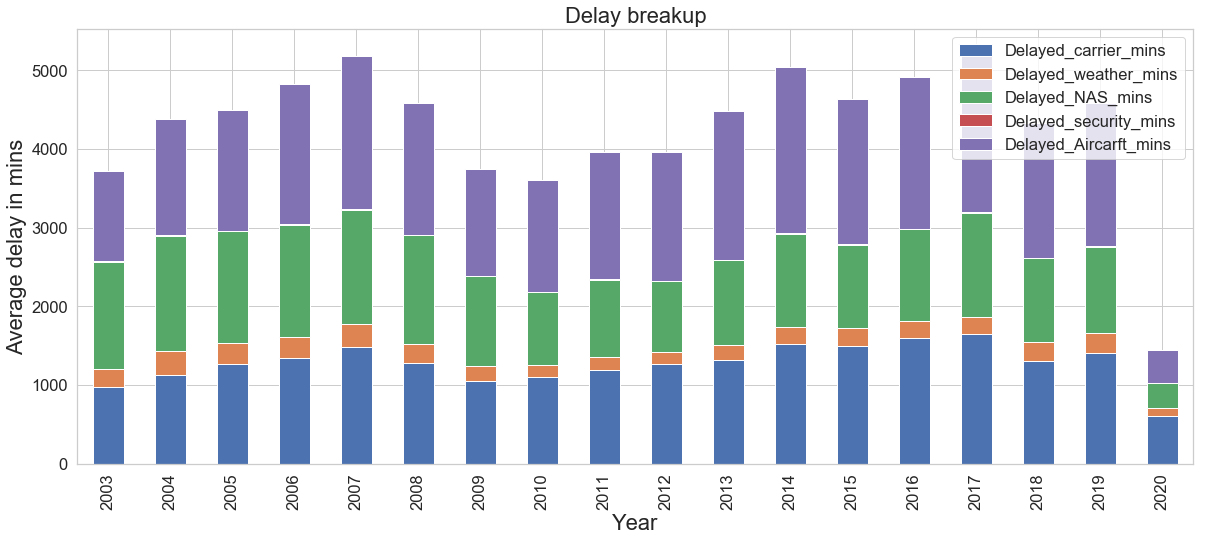

In [43]:
sb.set_style("whitegrid")
plot=df_delay.plot(kind='bar', stacked=True,figsize=(20, 8))
plt.xlabel('Year',fontsize=22)
plt.ylabel('Average delay in mins',fontsize=22)
plt.title('Delay breakup',fontsize=22);

##  Conclusion:


1.From analysing the Carrier's performance, SouthWest Airlines has recorded the worst figures in terms of delay, the SouthWeat 
 airlines puts up a pretty interesting case. They have been the worst managed carrier in terms of delay across the years but also they have also been the most favoured carrier service. While Allegiant airline stands the least favoured flight with least delays.
 
2.From the weather delay analysis, Atlanta and Dallas has recorded most the delayed airport by weather as it is susceptible to cyclones/hurricanes. While Chicago comes third which is prone to extreme snowfalls during winter.And as expected the weather delays have been maximum on June and Decemeber which is when the Rainy and winter seasons would be at peak,but the frequency of the flight operated is also high during these seasons as it could relate to Hoilday seasons.

3.For the general analysis of delays, Late aircraft delays contributes more National Aviation System delays which gives an idea 
of the operational efficieny of Aircrafts and Airports.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!